# This is a playground for UCI iris dataset.

There are two rows of error data in iris.data. Therefore bezdekIris.data is used, where the errors are corrected.

We import pandas to load and process data, numpy for some math, and matplotlib (v2.0.2) to plot figures.

The matplotlib version seems matter. E.g. v1.5.1 cannot change dot colors automatically if not given the "color" parameter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data as a dataframe
# len is for length, wid is for width
df = pd.read_csv("bezdekIris.data", header = None)
df.columns = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "classes"]
groups = list(df.groupby("classes"))

Populating the interactive namespace from numpy and matplotlib


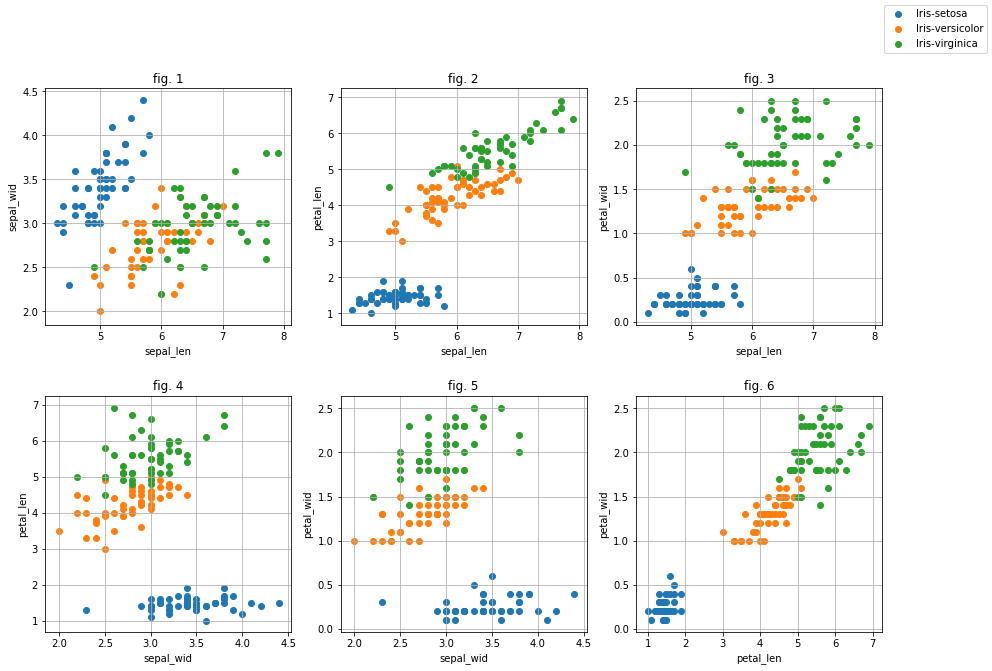

In [3]:
# Now let's plot something.
# Firstly, we make pairs of features and plot them as x,y axis.
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

fig, ax = plt.subplots(2, 3)
tmp = []
for name, item in groups:
	tmp.append(ax[0, 0].scatter(item["sepal_len"], item["sepal_wid"], label = name))
	ax[0, 1].scatter(item["sepal_len"], item["petal_len"], label = name)
	ax[0, 2].scatter(item["sepal_len"], item["petal_wid"], label = name)
	ax[1, 0].scatter(item["sepal_wid"], item["petal_len"], label = name)
	ax[1, 1].scatter(item["sepal_wid"], item["petal_wid"], label = name)
	ax[1, 2].scatter(item["petal_len"], item["petal_wid"], label = name)

ax[0, 0].set_xlabel("sepal_len"), ax[0, 0].set_ylabel("sepal_wid"), ax[0, 0].set_title("fig. 1"), ax[0, 0].grid(True)
ax[0, 1].set_xlabel("sepal_len"), ax[0, 1].set_ylabel("petal_len"), ax[0, 1].set_title("fig. 2"), ax[0, 1].grid(True)
ax[0, 2].set_xlabel("sepal_len"), ax[0, 2].set_ylabel("petal_wid"), ax[0, 2].set_title("fig. 3"), ax[0, 2].grid(True)
ax[1, 0].set_xlabel("sepal_wid"), ax[1, 0].set_ylabel("petal_len"), ax[1, 0].set_title("fig. 4"), ax[1, 0].grid(True)
ax[1, 1].set_xlabel("sepal_wid"), ax[1, 1].set_ylabel("petal_wid"), ax[1, 1].set_title("fig. 5"), ax[1, 1].grid(True)
ax[1, 2].set_xlabel("petal_len"), ax[1, 2].set_ylabel("petal_wid"), ax[1, 2].set_title("fig. 6"), ax[1, 2].grid(True)

fig.subplots_adjust(hspace = 0.3)
fig.legend(tmp, [x[0] for x in groups], loc = "upper right")
plt.show()


From the figures above, we can see that iris-setosa is quite different from the other two.

Blue dots are obviously separated from orange and green dots. Also, the directions to which they tilt are different.

Besides, in fig. 2 to 4, there seems to be a horizontal division between green dots and orange dots.

Therefore, we move on to study the ratio of each two of the features, and then the statistical measures of all features.

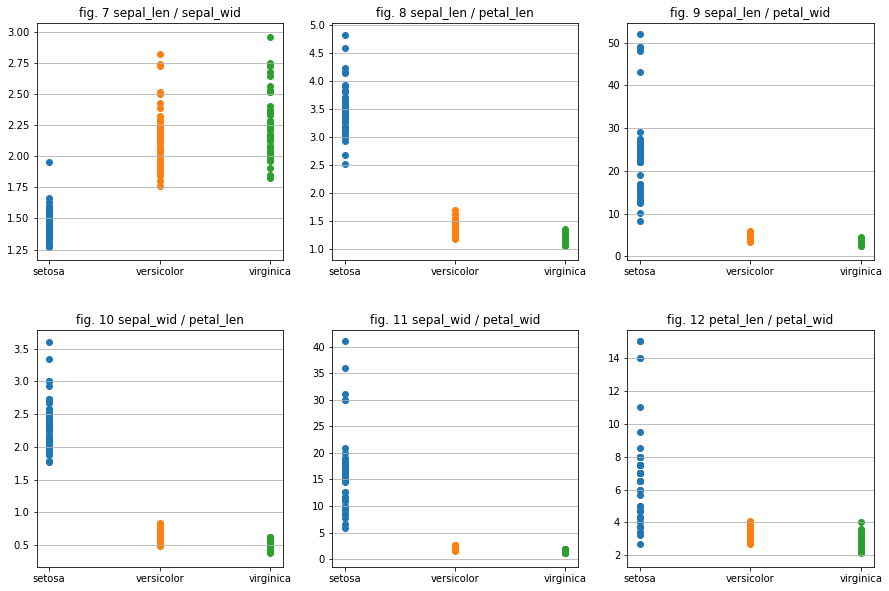

In [4]:
# Here is for the ratio of each two of the attributes
fig, ax = plt.subplots(2, 3)
for cnt, (_, item) in enumerate(groups):
	ax[0, 0].scatter([cnt] * len(item), item["sepal_len"] / item["sepal_wid"])
	ax[0, 1].scatter([cnt] * len(item), item["sepal_len"] / item["petal_len"])
	ax[0, 2].scatter([cnt] * len(item), item["sepal_len"] / item["petal_wid"])
	ax[1, 0].scatter([cnt] * len(item), item["sepal_wid"] / item["petal_len"])
	ax[1, 1].scatter([cnt] * len(item), item["sepal_wid"] / item["petal_wid"])
	ax[1, 2].scatter([cnt] * len(item), item["petal_len"] / item["petal_wid"])

names = ["setosa", "versicolor", "virginica"]
ax[0, 0].set_xticks(np.arange(0, 3)), ax[0, 0].set_xticklabels(names), ax[0, 0].set_title("fig. 7 sepal_len / sepal_wid")
ax[0, 1].set_xticks(np.arange(0, 3)), ax[0, 1].set_xticklabels(names), ax[0, 1].set_title("fig. 8 sepal_len / petal_len")
ax[0, 2].set_xticks(np.arange(0, 3)), ax[0, 2].set_xticklabels(names), ax[0, 2].set_title("fig. 9 sepal_len / petal_wid")
ax[1, 0].set_xticks(np.arange(0, 3)), ax[1, 0].set_xticklabels(names), ax[1, 0].set_title("fig. 10 sepal_wid / petal_len")
ax[1, 1].set_xticks(np.arange(0, 3)), ax[1, 1].set_xticklabels(names), ax[1, 1].set_title("fig. 11 sepal_wid / petal_wid")
ax[1, 2].set_xticks(np.arange(0, 3)), ax[1, 2].set_xticklabels(names), ax[1, 2].set_title("fig. 12 petal_len / petal_wid")
ax[0, 0].yaxis.grid(True), ax[0, 1].yaxis.grid(True), ax[0, 2].yaxis.grid(True)
ax[1, 0].yaxis.grid(True), ax[1, 1].yaxis.grid(True), ax[1, 2].yaxis.grid(True)

fig.subplots_adjust(hspace = 0.3)
plt.show()

First, we plot the ratio of each pair of the attributes. We can clearly see that blue dots are at a much different level, especially in fig. 8 and 10.

Therefore, we can make $$\dfrac{sepal\_len}{petal\_len}$$ or $$\dfrac{sepal\_wid}{petal\_len}$$ as a feature to distinguish iris setosa from other two types of iris.

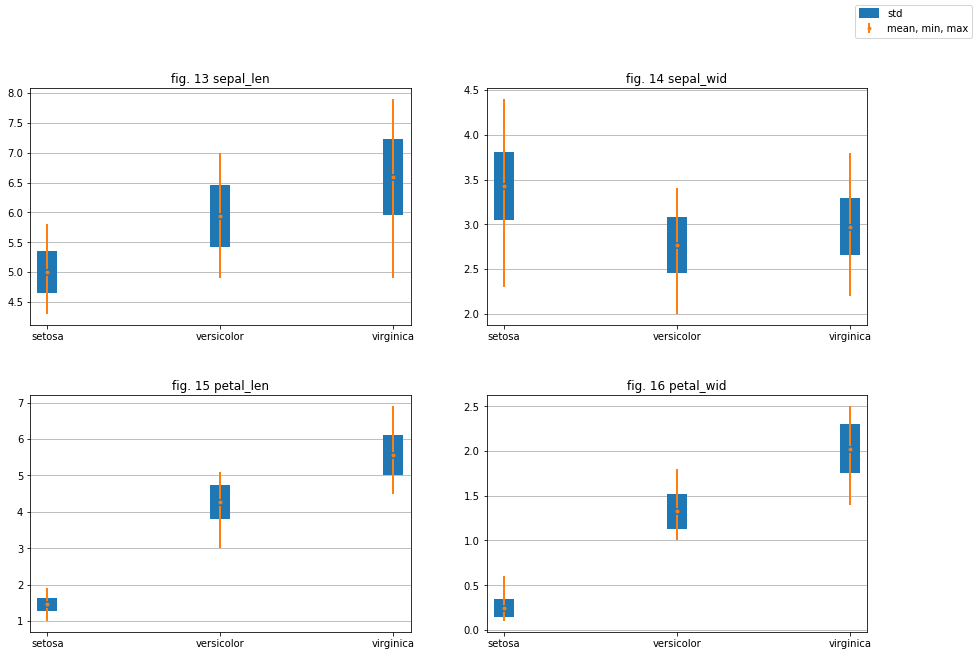

In [5]:
# Here is for statistical measures e.g. mean, std, min, max.
sepal_len = pd.DataFrame([(groups[x][1].describe().transpose()[["mean", "std", "min", "max"]])
                          .transpose()["sepal_len"] for x in range(0, 3)])
sepal_wid = pd.DataFrame([(groups[x][1].describe().transpose()[["mean", "std", "min", "max"]])
                          .transpose()["sepal_wid"] for x in range(0, 3)])
petal_len = pd.DataFrame([(groups[x][1].describe().transpose()[["mean", "std", "min", "max"]])
                          .transpose()["petal_len"] for x in range(0, 3)])
petal_wid = pd.DataFrame([(groups[x][1].describe().transpose()[["mean", "std", "min", "max"]])
                          .transpose()["petal_wid"] for x in range(0, 3)])

fig, ax = plt.subplots(2, 2)

_1 = ax[0, 0].errorbar(np.arange(0, 3), sepal_len["mean"], sepal_len["std"], fmt = 'o', lw=20)
_2 = ax[0, 0].errorbar(np.arange(0, 3), sepal_len["mean"], 
                  [sepal_len["mean"] - sepal_len["min"], sepal_len["max"] - sepal_len["mean"]], 
                  fmt = '.', lw = 2)

ax[0, 1].errorbar(np.arange(0, 3), sepal_wid["mean"], sepal_wid["std"], fmt = 'o', lw = 20)
ax[0, 1].errorbar(np.arange(0, 3), sepal_wid["mean"], 
                  [sepal_wid["mean"] - sepal_wid["min"], sepal_wid["max"] - sepal_wid["mean"]], 
                  fmt = '.', lw = 2)

ax[1, 0].errorbar(np.arange(0, 3), petal_len["mean"], petal_len["std"], fmt = 'o', lw = 20)
ax[1, 0].errorbar(np.arange(0, 3), petal_len["mean"], 
                  [petal_len["mean"] - petal_len["min"], petal_len["max"] - petal_len["mean"]], 
                  fmt = '.', lw = 2)

ax[1, 1].errorbar(np.arange(0, 3), petal_wid["mean"], petal_wid["std"], fmt = 'o', lw = 20)
ax[1, 1].errorbar(np.arange(0, 3), petal_wid["mean"], 
                  [petal_wid["mean"] - petal_wid["min"], petal_wid["max"] - petal_wid["mean"]], 
                  fmt = '.', lw = 2)

names = ["setosa", "versicolor", "virginica"]
ax[0, 0].set_xticks(np.arange(0, 3)), ax[0, 0].set_xticklabels(names), ax[0, 0].set_title("fig. 13 sepal_len")
ax[0, 1].set_xticks(np.arange(0, 3)), ax[0, 1].set_xticklabels(names), ax[0, 1].set_title("fig. 14 sepal_wid")
ax[1, 0].set_xticks(np.arange(0, 3)), ax[1, 0].set_xticklabels(names), ax[1, 0].set_title("fig. 15 petal_len")
ax[1, 1].set_xticks(np.arange(0, 3)), ax[1, 1].set_xticklabels(names), ax[1, 1].set_title("fig. 16 petal_wid")
ax[0, 0].yaxis.grid(True), ax[0, 1].yaxis.grid(True), ax[1, 0].yaxis.grid(True), ax[1, 1].yaxis.grid(True)

fig.subplots_adjust(hspace = 0.3)
fig.legend([_1, _2], ["std", "mean, min, max"], loc = "upper right")
plt.show()

Using errorbar can show how the data sample of one class distributes. The blue bar represents for the std. The orange dot in the middle is mean value, and the top and bottom of the orange line stands for max and min.

The blue bar shows that most data is distributed in the range of its height. If the height of blue bar is small, it indicates that the data are concentrated around mean value. If the height is large, then data is not concentrated.

In fig. 1 to 12, iris versicolor and iris virginica are not as easy to distinguish as iris setosa is. We have discussed that in fig. 2 to 4, there seems to be a horizontal division between green dots and orange dots. Therefore, through fig. 13 to 16, where statistical measures are plotted, we may find some feature to distinguish these two kinds.

Truly, iris setosa is still very distinguishable in respect of petal length and petal width. For versicolor and virginica, by comparing the vertical position of blue bars, we can conclude that most of them can be distinguished by petal length and petal width.

In [6]:
# Last but not least, let's look through some correlation coefficients.
# We output the correlation matrix.
# Iris setosa
df[:50].corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,0.742547,0.267176,0.278098
sepal_wid,0.742547,1.000000,0.177700,0.232752
petal_len,0.267176,0.177700,1.000000,0.331630
petal_wid,0.278098,0.232752,0.331630,1.000000


In [7]:
# Iris versicolor
df[50:100].corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,0.525911,0.754049,0.546461
sepal_wid,0.525911,1.000000,0.560522,0.663999
petal_len,0.754049,0.560522,1.000000,0.786668
petal_wid,0.546461,0.663999,0.786668,1.000000


In [8]:
# Iris virginica
df[100:150].corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,0.457228,0.864225,0.281108
sepal_wid,0.457228,1.000000,0.401045,0.537728
petal_len,0.864225,0.401045,1.000000,0.322108
petal_wid,0.281108,0.537728,0.322108,1.000000


In [9]:
# Overall
df.corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.117570,0.871754,0.817941
sepal_wid,-0.117570,1.000000,-0.428440,-0.366126
petal_len,0.871754,-0.428440,1.000000,0.962865
petal_wid,0.817941,-0.366126,0.962865,1.000000


We cannot find an obvious similarity among the four correlation matrices.

For iris setosa, the highest correlation coefficient is between sepal length and sepal width. Situation is different in other three matrices. This one is not surprising, because from the figures we plotted above, iris setosa always seems not to be so similar to other two kinds of iris.

For iris versicolor, the highest correlation coefficient is between petal length and petal width, while the correlation coefficient between sepal length and petal length is also high.

For iris virginica, the highest correlation coefficient is between sepal length and petal length.

These are indeed some differences, but it is not sure to what extend can these data be used in distinguishing the three kinds of iris.

The last one is the overall correlation matrix of the whole UCI-Iris dataset. There ARE some values that are distinctly large (in the scale of [0, 1]). However, the information is not so useful in this case. Maybe it can be used when studying iris and species other than iris.